## 0. Install

In [ ]:
# !pip install mediapipe-silicon opencv-python pandas scikit-learn

## 1. Import Dependencies

In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

objc[49092]: Class CaptureDelegate is implemented in both /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x1057d0860) and /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x15ec3a520). One of the two will be used. Which one is undefined.
objc[49092]: Class CVWindow is implemented in both /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x104488a68) and /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x15ec3a570). One of the two will be used. Which one is undefined.
objc[49092]: Class CVView is implemented in both /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x104488a90) and /Users/min_leon/anaconda3/envs/mp_vision/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x15ec3a598). One of the two will be

## 2. Make Some Detections

In [7]:
cap = cv2.VideoCapture(0)
# Initate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, image = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detections
        results = pose.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

-1

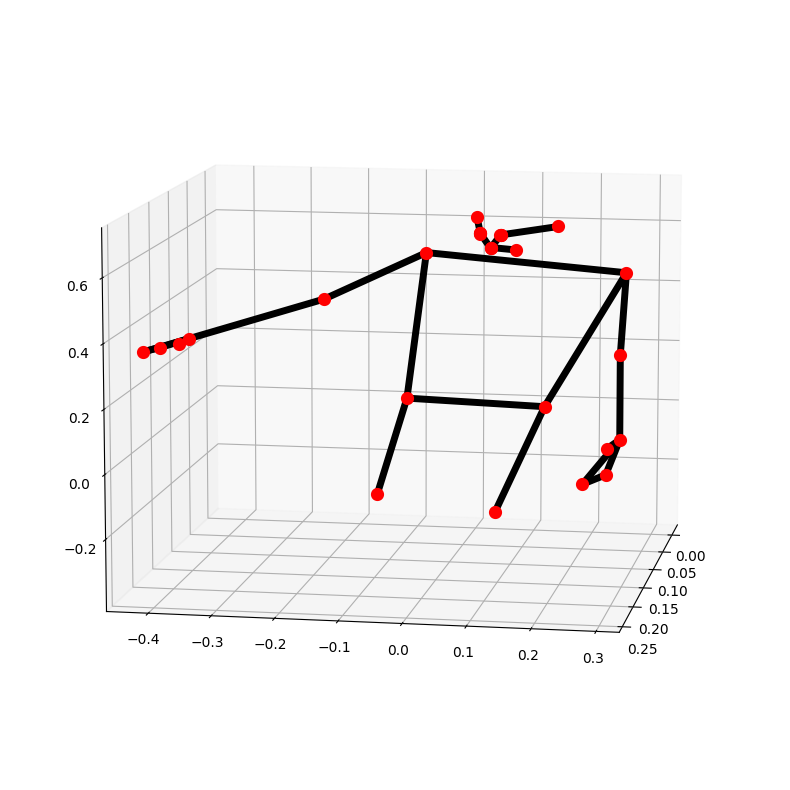

In [4]:
mp_drawing.plot_landmarks(
    results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

## 3. Save Video

In [31]:
cap = cv2.VideoCapture(0)
if cap.isOpened:
    file_path = 'exercise.avi'
    fps = 30
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')            # Encoding Format
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int (height))                   # Frame Size
    
    out = cv2.VideoWriter(file_path, fourcc, fps, size) # Create VideoWriter Object
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording', frame)
            out.write(frame)                            # Save this avi file
            if cv2.waitKey(int(1000/fps)) != -1:
                break
        elif cv2.waitKey(10) & 0xFF == ord('q'):
            break
        else:
            print('no file!')
            break
    out.release()                                       # Close
else:
    print("Can`t open camera!")
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

-1

## 4. Capture Landmarks and Export CSV

#### 4_1. Import Dependencies

In [8]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

#### 4_2. Capture Landmarks

In [9]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']

In [10]:
landmarks[1:9]

['x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2']

In [11]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [12]:
# def export_landmark(results, action):
#     try:
#         keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
#         keypoints.insert(0, action)
        
#         with open('coords.csv', mode='a', newline='') as f:
#             csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#             csv_writer.writerow(keypoints)
#     except Exception as e:
#         pass

In [13]:
def export_landmark(results, action):
    try:
        keypoints = [action] + [coord for res in results.pose_landmarks.landmark for coord in [res.x, res.y, res.z, res.visibility]]
        
        with open('coords.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass

In [14]:
print(results.pose_landmarks)

None


In [15]:
export_landmark(results, 'correct_bench')

In [16]:
cap = cv2.VideoCapture('exercise.avi')
# Initate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, image = cap.read()
        
        if not ret:  # 비디오 재생이 완료되면 루프를 종료합니다.
            break
        
        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detections
        results = pose.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        k = cv2.waitKey(1)
        if k == ord('c'): # c
            export_landmark(results, 'correct_bench')
            print('correct_bench')
        if k == ord('i'): # i
            export_landmark(results, 'incorrect_bench')
            print('incorrect_bench')
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

-1

## 5. Train Custom Model Using Scikit Learn

### 5_1. Read in Collected Data and Process

import pandas as pd
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv('coords.csv')

In [44]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,incorrect_bench,0.209779,0.606982,-0.448319,0.871631,0.232083,0.432142,-0.579049,0.870576,0.243667,...,1.387369,0.111027,0.196588,2.102742,0.357914,0.190829,0.242121,2.084950,1.087417,0.131178
1,correct_bench,0.397640,0.753927,-1.256084,0.941454,0.446002,0.635224,-0.912735,0.939417,0.480872,...,0.208926,0.046698,0.315932,3.082724,-0.590443,0.084193,-0.233126,2.751662,-0.388471,0.057850
2,correct_bench,0.184486,0.634370,-0.517659,0.858746,0.219954,0.437366,-0.632456,0.857325,0.224708,...,1.271181,0.123073,0.225745,1.212236,0.187213,0.209626,0.240453,1.259818,0.901725,0.144945
3,correct_bench,0.199726,0.713810,-1.001780,0.947033,0.191754,0.583863,-0.830457,0.945212,0.212389,...,0.200025,0.044210,0.341723,2.222625,0.278378,0.079498,-0.125318,1.657402,-0.383224,0.057973
4,incorrect_bench,0.356669,0.288933,-2.442795,0.902285,0.427736,0.071901,-2.238052,0.899084,0.471814,...,0.596038,0.077841,0.509373,4.634522,-0.744538,0.136590,0.265954,4.545126,-0.250512,0.094579


In [45]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
6,correct_bench,0.388992,0.713699,-1.904441,0.920509,0.450461,0.597789,-1.649572,0.917853,0.489687,...,0.046415,0.063310,0.555215,3.993670,-1.181513,0.112208,-0.047726,3.847872,-0.766046,0.077346
7,correct_bench,0.418917,0.758117,-0.928541,0.935214,0.472079,0.635774,-0.766428,0.932983,0.507899,...,0.104607,0.051498,0.517132,4.520791,-0.504225,0.092195,0.208502,4.333850,-0.556719,0.063491
8,correct_bench,0.397640,0.753927,-1.256084,0.941454,0.446002,0.635224,-0.912735,0.939417,0.480872,...,0.208926,0.046698,0.315932,3.082724,-0.590443,0.084193,-0.233126,2.751662,-0.388471,0.057850
9,correct_bench,0.199726,0.713810,-1.001780,0.947033,0.191754,0.583863,-0.830457,0.945212,0.212389,...,0.200025,0.044210,0.341723,2.222625,0.278378,0.079498,-0.125318,1.657402,-0.383224,0.057973
10,incorrect_bench,0.107184,0.667476,-1.047238,0.905988,0.129947,0.502849,-1.015548,0.888100,0.131532,...,0.988324,0.077346,-0.084216,-0.048023,0.191120,0.108831,0.054267,-0.171820,0.417198,0.093372


In [47]:
df[df['class'] == 'correct_bench']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
1,correct_bench,0.397640,0.753927,-1.256084,0.941454,0.446002,0.635224,-0.912735,0.939417,0.480872,...,0.208926,0.046698,0.315932,3.082724,-0.590443,0.084193,-0.233126,2.751662,-0.388471,0.057850
2,correct_bench,0.184486,0.634370,-0.517659,0.858746,0.219954,0.437366,-0.632456,0.857325,0.224708,...,1.271181,0.123073,0.225745,1.212236,0.187213,0.209626,0.240453,1.259818,0.901725,0.144945
3,correct_bench,0.199726,0.713810,-1.001780,0.947033,0.191754,0.583863,-0.830457,0.945212,0.212389,...,0.200025,0.044210,0.341723,2.222625,0.278378,0.079498,-0.125318,1.657402,-0.383224,0.057973
5,correct_bench,0.107184,0.667476,-1.047238,0.905988,0.129947,0.502849,-1.015548,0.888100,0.131532,...,0.988324,0.077346,-0.084216,-0.048023,0.191120,0.108831,0.054267,-0.171820,0.417198,0.093372
6,correct_bench,0.388992,0.713699,-1.904441,0.920509,0.450461,0.597789,-1.649572,0.917853,0.489687,...,0.046415,0.063310,0.555215,3.993670,-1.181513,0.112208,-0.047726,3.847872,-0.766046,0.077346
7,correct_bench,0.418917,0.758117,-0.928541,0.935214,0.472079,0.635774,-0.766428,0.932983,0.507899,...,0.104607,0.051498,0.517132,4.520791,-0.504225,0.092195,0.208502,4.333850,-0.556719,0.063491
8,correct_bench,0.397640,0.753927,-1.256084,0.941454,0.446002,0.635224,-0.912735,0.939417,0.480872,...,0.208926,0.046698,0.315932,3.082724,-0.590443,0.084193,-0.233126,2.751662,-0.388471,0.057850
9,correct_bench,0.199726,0.713810,-1.001780,0.947033,0.191754,0.583863,-0.830457,0.945212,0.212389,...,0.200025,0.044210,0.341723,2.222625,0.278378,0.079498,-0.125318,1.657402,-0.383224,0.057973


In [48]:
X = df.drop('class', axis=1)
y = df['class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
y_test

5       correct_bench
0     incorrect_bench
9       correct_bench
10    incorrect_bench
Name: class, dtype: object

### 5_2. Train Machine Learning Classification Model

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [54]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [55]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [56]:
fit_models['rc'].predict(X_test)

array(['correct_bench', 'correct_bench', 'correct_bench', 'correct_bench'],
      dtype='<U15')

### 5_3. Evaluate and Serialize Model

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [65]:
for algorithm, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algorithm, accuracy_score(y_test.values, yhat), 
          precision_score(y_test.values, yhat, average="binary", pos_label="correct_bench"),
          recall_score(y_test.values, yhat, average="binary", pos_label="correct_bench"))

lr 0.5 0.5 1.0
rc 0.5 0.5 1.0
rf 0.5 0.5 1.0
gb 0.5 0.5 1.0


In [67]:
yhat = fit_models['rf'].predict(X_test)

In [70]:
yhat[:]

array(['correct_bench', 'correct_bench', 'correct_bench', 'correct_bench'],
      dtype=object)

In [71]:
with open('benchpress.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

### 5_4. Make Detections with Model

In [72]:
with open('benchpress.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
cap = cv2.VideoCapture(0)
counter = 0
current_stage = ''
